In [90]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from itertools import chain, combinations
from scipy.cluster.hierarchy import dendrogram
from networkx.algorithms import community, centrality, components

<class 'networkx.classes.graph.Graph'>


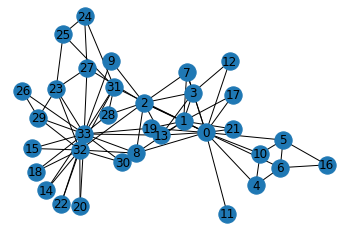

In [12]:
# get graph
G = nx.karate_club_graph()
print(type(G))
pos = nx.spring_layout(G)
labels=nx.draw_networkx_labels(G,pos=pos)
nx.draw(G, pos)

### Connectedness

In [84]:
def report_connectedness(G, save_img_path=None):
    """
        Checks if the graph is connected
        and returns the connected components
        if the graph is disconnected
        
        G (nx.Graph): graph for which the 
                top nodes must be determined.
                
        save_img_path (str): path to save visualisation
                of the components detected.
        
        Returns:
            True: if the given graph is connected.
            
            False, connected_components: if the graph
                is disconnected along with list of sets of
                nodes representing the components.
    """
    # aggregrate connectedness metrics
    is_connected = components.is_connected(G)
    
    if is_connected:
        return True
    
    else:
        # get the connected components if the graph is disconnected
        connected_components = components.connected_components(G)
    
        # save the disconnected components visualisation if the path given
        if save_img_path:
            colors = np.linspace(0, 1, len(connected_components))
            com_color_map = dict()
            for idx, com in enumerate(connected_components):
                for node in com:
                    com_color_map[node] = colors[idx]

            labels=nx.draw_networkx_labels(G,pos=pos)
            nx.draw(G, pos, node_color=list(com_color_map.values()))
            plt.savefig(save_img_path, format="PNG")
    
        return (False, connected_components)

### Top Nodes

node centrality mesures

In [47]:
def top_nodes(G, k=3):
    """
        Returns the top k nodes for various
        centrality measures: degree, 
        betweennes and closeness.
        
        Args:
            G (nx.Graph): graph for which the 
                top nodes must be determined.
            
            k (int): number of top nodes to return.
                if set to -ve, all the nodes will be
                returned.
            
        Returns:
            res_dict (dict): dictionary of each centrality
                measure with list of top k nodes in that 
                measure as values to the dictionary.
    """
    # number of nodes in the graph each node is connected to
    node_deg_dict = centrality.degree_centrality(G)
    # number of all pair shortest paths that pass through each node
    node_btw_dict = centrality.betweenness_centrality(G)
    # number of neighbours connected to each other for each node
    node_clo_dict = centrality.closeness_centrality(G)
    
    # sort by nodes by each centrality measure
    top_k_deg_nodes = sorted(node_deg_dict.items(), key = lambda x: x[1])
    top_k_btw_nodes = sorted(node_btw_dict.items(), key = lambda x: x[1])
    top_k_clo_nodes = sorted(node_clo_dict.items(), key = lambda x: x[1])
    
    # pick the top k nodes
    if k > 0:
        res = (top_k_deg_nodes[-k:], top_k_btw_nodes[-k:], top_k_clo_nodes[-k:])
    else:
        res = (top_k_deg_nodes[::-1], top_k_btw_nodes[::-1], top_k_clo_nodes[::-1])
    
    # format and return the top nodes for each centrality 
    res_dict = dict()
    res_dict["node_degree"] = list(zip(*res[0]))[0]
    res_dict["node_betweenness"] = list(zip(*res[1]))[0]
    res_dict["node_closeness"] = list(zip(*res[2]))[0]
    return res_dict

In [48]:
top_nodes(G, 5)

{'degree': (1, 2, 32, 0, 33),
 'betweenness': (31, 2, 32, 33, 0),
 'closeness': (32, 31, 33, 2, 0)}

### Top Edges

In [50]:
def top_edges(G, k=3):
    """
        Returns the top k edges for various
        centrality measures: betweenness and
        information flow.
        
        Args:
            G (nx.Graph): graph for which the 
                top nodes must be determined.
            
            k (int): number of top edges to return.
                if set to -ve, all the edges will be
                returned.
            
        Returns:
            res_dict (dict): dictionary of each centrality
                measure with list of top k edges in that 
                measure as values to the dictionary.
    """
    # number of all pair shortest paths that pass through each edge
    edge_btw_dict = centrality.edge_betweenness_centrality(G)
    # ability for information flow for each edge
    edge_cur_dict = centrality.edge_current_flow_betweenness_centrality(G)
    
    # sort by nodes by each centrality measure
    top_k_btw_edges = sorted(edge_btw_dict.items(), key = lambda x: x[1])
    top_k_cur_edges = sorted(edge_cur_dict.items(), key = lambda x: x[1])
    
    # pick the top k edges
    if k > 0:
        res = (top_k_btw_edges[-k:], top_k_cur_edges[-k:])
    else:
        res = (top_k_btw_edges[::-1], top_k_cur_edges[::-1])
    
    # format and return the top nodes for each centrality 
    res_dict = dict()
    res_dict["edge_betweeness"] = list(zip(*res[0]))[0]
    res_dict["edge_information_flow"] = list(zip(*res[1]))[0]
    return res_dict

In [54]:
top_edges(G, k=5)

{'edge_betweeness': ((0, 8), (0, 2), (0, 5), (0, 6), (0, 31)),
 'edge_information_flow': ((30, 1), (33, 13), (33, 19), (8, 0), (31, 0))}

### Community Detection

In [66]:
def detect_communities(G, save_img_path=None):
    """
        Returns the communities detected in the given
        graph using optimal modularity approach. 
        
        Args:
            G (nx.Graph): graph for which the 
                top nodes must be determined.
                
            save_img_path (str): path to save visualisation
                of the communities detected.
            
        Returns:
            communities (list): list of tuples of nodes representing
                communities detected.
    """
    # perform community detection using greedy modularity approach
    _coms = community.greedy_modularity_communities(G)
    communities = [set(c) for c in _coms]
    
    # save image if path given
    if save_img_path:
        colors = np.linspace(0, 1, len(communities))

        com_color_map = dict()
        for idx, com in enumerate(communities):
            for node in com:
                com_color_map[node] = colors[idx]
        
        labels=nx.draw_networkx_labels(G,pos=pos)
        nx.draw(G, pos, node_color=list(com_color_map.values()))
        plt.savefig(save_img_path, format="PNG")
    
    return communities

[{8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33},
 {1, 2, 3, 7, 9, 12, 13, 17, 21},
 {0, 4, 5, 6, 10, 11, 16, 19}]

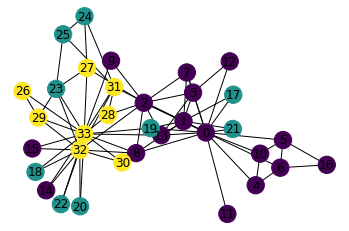

In [64]:
detect_communities(G, save_img_path="test.png")

### Hierarchal Clustering

In [93]:
def hierarchal_clustering(G, save_img_path=None):
    """
        Perform hierarchal clustering on a given graph
        using the Girvan-Newman algorithm and visualise
        if path given.
        
        G (nx.Graph): graph for which the 
                top nodes must be determined.
        
        save_img_path (str): path to save visualisation
                of the communities detected.
        
        Returns:
            communities (list): hierarchy of clusters as list
                with the index referring to each stage of clustering.
    """
    # obtain hierarchal clusters using the Girvan-Newman Algorithm
    communities = list(nx.community.girvan_newman(G))
    
    if save_img_path:

        # building initial dict of node_id to each possible subset:
        node_id = 0
        init_node2community_dict = {node_id: communities[0][0].union(communities[0][1])}
        for comm in communities:
            for subset in list(comm):
                if subset not in init_node2community_dict.values():
                    node_id += 1
                    init_node2community_dict[node_id] = subset

        # turning this dictionary to the desired format in @mdml's answer
        node_id_to_children = {e: [] for e in init_node2community_dict.keys()}
        for node_id1, node_id2 in combinations(init_node2community_dict.keys(), 2):
            for node_id_parent, group in init_node2community_dict.items():
                if len(init_node2community_dict[node_id1].intersection(init_node2community_dict[node_id2])) == 0 and group == init_node2community_dict[node_id1].union(init_node2community_dict[node_id2]):
                    node_id_to_children[node_id_parent].append(node_id1)
                    node_id_to_children[node_id_parent].append(node_id2)

        # also recording node_labels dict for the correct label for dendrogram leaves
        node_labels = dict()
        for node_id, group in init_node2community_dict.items():
            if len(group) == 1:
                node_labels[node_id] = list(group)[0]
            else:
                node_labels[node_id] = ''

        # also needing a subset to rank dict to later know within all k-length merges which came first
        subset_rank_dict = dict()
        rank = 0
        for e in communities[::-1]:
            for p in list(e):
                if tuple(p) not in subset_rank_dict:
                    subset_rank_dict[tuple(sorted(p))] = rank
                    rank += 1
        subset_rank_dict[tuple(sorted(chain.from_iterable(communities[-1])))] = rank

        # my function to get a merge height so that it is unique (probably not that efficient)
        def get_merge_height(sub):
            sub_tuple = tuple(sorted([node_labels[i] for i in sub]))
            n = len(sub_tuple)
            other_same_len_merges = {k: v for k, v in subset_rank_dict.items() if len(k) == n}
            min_rank, max_rank = min(other_same_len_merges.values()), max(other_same_len_merges.values())
            range = (max_rank-min_rank) if max_rank > min_rank else 1
            return float(len(sub)) + 0.8 * (subset_rank_dict[sub_tuple] - min_rank) / range

        # finally using @mdml's magic, slightly modified:
        G           = nx.DiGraph(node_id_to_children)
        nodes       = G.nodes()
        leaves      = set( n for n in nodes if G.out_degree(n) == 0 )
        inner_nodes = [ n for n in nodes if G.out_degree(n) > 0 ]

        # Compute the size of each subtree
        subtree = dict( (n, [n]) for n in leaves )
        for u in inner_nodes:
            children = set()
            node_list = list(node_id_to_children[u])
            while len(node_list) > 0:
                v = node_list.pop(0)
                children.add( v )
                node_list += node_id_to_children[v]
            subtree[u] = sorted(children & leaves)

        inner_nodes.sort(key=lambda n: len(subtree[n])) # <-- order inner nodes ascending by subtree size, root is last

        # Construct the linkage matrix
        leaves = sorted(leaves)
        index  = dict( (tuple([n]), i) for i, n in enumerate(leaves) )
        Z = []
        k = len(leaves)
        for i, n in enumerate(inner_nodes):
            children = node_id_to_children[n]
            x = children[0]
            for y in children[1:]:
                z = tuple(sorted(subtree[x] + subtree[y]))
                i, j = index[tuple(sorted(subtree[x]))], index[tuple(sorted(subtree[y]))]
                Z.append([i, j, get_merge_height(subtree[n]), len(z)]) # <-- float is required by the dendrogram function
                index[z] = k
                subtree[z] = list(z)
                x = z
                k += 1

        # dendrogram
        dendrogram(Z, labels=[node_labels[node_id] for node_id in leaves])

        # save the dendogram
        plt.savefig(save_img_path, format='PNG')
        
    return communities

[({0, 1, 2, 3, 5, 6, 7, 9}, {4, 8, 10}),
 ({0, 1, 2, 3, 6, 7}, {4, 8, 10}, {5, 9}),
 ({0, 3, 6}, {1, 2, 7}, {4, 8, 10}, {5, 9}),
 ({0, 3}, {1, 2, 7}, {4, 8, 10}, {5, 9}, {6}),
 ({0, 3}, {1, 2, 7}, {4, 8}, {5, 9}, {6}, {10}),
 ({0}, {1, 2, 7}, {3}, {4, 8}, {5, 9}, {6}, {10}),
 ({0}, {1}, {2, 7}, {3}, {4, 8}, {5, 9}, {6}, {10}),
 ({0}, {1}, {2}, {3}, {4, 8}, {5, 9}, {6}, {7}, {10}),
 ({0}, {1}, {2}, {3}, {4}, {5, 9}, {6}, {7}, {8}, {10}),
 ({0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9}, {10})]

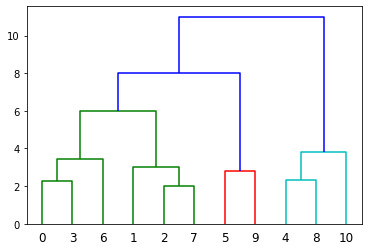

In [94]:
hierarchal_clustering(G, save_img_path='hc.png')